In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar  4 13:53:18 2021

@author: kadambini.indurkar
"""

In [7]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import category_encoders as ce
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
import joblib
from xgboost import XGBRegressor
import glob
import datetime
import os
from datetime import timedelta
# from pmdarima.arima.utils import nsdiffs
# import pymannkendall as mk
from dateutil.relativedelta import relativedelta
import datetime as dt

In [8]:
def create_lag_variables(df, date_column, grouped_on, shifting_var
                         , month_ascending=True, lag_vars_range = list()):
    """
    Function to create lag-variables    
    Parameters
    ----------
    df : pandas dataframe
        DESCRIPTION. Containing column names like month, banner_id, sku_id and actual_quantity.
    lag_vars_range : list, not optional
        DESCRIPTION. Pass a set of integers which will then generate the individual
        lag variables.

    Returns
    -------
    df : updated pandas dataframe with lag variables
        The passed dataframe is updated with the set of lag-variables 
        as passed to lag_vars_range

    """
    for lag in lag_vars_range:
        df['lag_'+str(lag)] = (df
                               .sort_values(by = date_column, ascending = month_ascending)
                               .groupby(grouped_on)[shifting_var].shift(lag)
                               .fillna(0))
    return df

In [9]:
def create_moving_avg(df, ma_vars = list()):
    """
    

    Parameters
    ----------
    df : TYPE
        DESCRIPTION.
    ma_vars : TYPE, optional
        DESCRIPTION. The default is list().

    Returns
    -------
    None.

    """
    
    
    # for ma_var in ma_vars:
    #     for i in range(ma_var):
    #         numerator = df["lag_"+(i+3)]
    #         df["ma_"+str(ma_var)] = df["lag_"+(i+3)]
    
    
    for ma_var in ma_vars:
        if ma_var == 1:
            df["naive"] = df["lag_3"]
        if ma_var == 2:
            df["ma_2"] = (df["lag_3"]+df["lag_4"])/2
        if ma_var == 3:
            df["ma_3"] = (df["lag_3"]+df["lag_4"]+df["lag_5"])/3
        if ma_var == 4:
            df["ma_4"] = (df["lag_3"]+df["lag_4"]+df["lag_5"]+df["lag_6"])/4
        if ma_var == 5:
            df["ma_5"] = (df["lag_3"]+df["lag_4"]+df["lag_5"]+df["lag_6"]+df["lag_7"])/5
            
    return df


In [10]:
def create_time_vars(dataset, month=True, year = True):
    """
    

    Parameters
    ----------
    dataset : TYPE
        DESCRIPTION.
    month : TYPE, optional
        DESCRIPTION. The default is True.
    year : TYPE, optional
        DESCRIPTION. The default is True.

    Returns
    -------
    dataset : TYPE
        DESCRIPTION.

    """
    if month:
        dataset["month_num"] = pd.to_datetime(dataset["month"]).dt.month
    if year:
        dataset["year_num"] = pd.to_datetime(dataset["month"]).dt.year
        
    return dataset

In [11]:
def deltamonths(b, a):
    
    from dateutil.relativedelta import relativedelta
    
    rdelta = relativedelta(b, a)
    return rdelta.years*12 + rdelta.months +1


In [12]:
# # Cyclic Features

# def encode(data, col, max_val):
#     data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
#     data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
#     data[col + '_fourier'] = data[col + '_cos'] + data[col + '_sin']
#     return data

# # Convert this feature to its sin and cos components to represent cyclical behavior
# for n in ('Month', 'quarter'):
#     print("Adding cyclic features for ", n)
#     max_val = max(merged_df_final.loc[:, n])
#     merged_df_final = encode(merged_df_final, n , max_val)
# merged_df_final.head(3)   

# merged_df=merged_df_final.copy()

# #merged_df.to_csv("merged_df.csv")

# merged_df.head(2)

Adding cyclic features for  Month


NameError: name 'merged_df_final' is not defined

In [62]:
def time_features(df):
    df['Year_Nominal'] = df['Date'].dt.year
    df['Year_Num'] = df['Year_Nominal'] - df['Year_Nominal'].min() + 1
    # df['Year_Nominal'] = df['Year_Nominal'].astype(str)
    
    df['Quarter_Num'] = df['Date'].dt.quarter
    df['Quarter_Sin'] = np.sin(2 * np.pi * (df['Quarter_Num']-1)/4)
    df['Quarter_Cos'] = np.cos(2 * np.pi * (df['Quarter_Num']-1)/4)
    # df['Quarter_Nominal'] = df['Quarter_Num'].astype(str)
    
    df['Month_Num'] = df['Date'].dt.month
    df['Month_Sin'] = np.sin(2 * np.pi * (df['Month_Num']-1)/12)
    df['Month_Cos'] = np.cos(2 * np.pi * (df['Month_Num']-1)/12)
    # df['Month_Nominal'] = df['Month_Num'].astype(str)
    
    return df

In [13]:
def get_season(x):
    if x >= 12 and x <= 2:
        return "Winter"
    elif x >= 3 and x <= 5:
        return "Spring"
    elif x >= 6 and x <= 8:
        return "Summer"
    else:
        return "Autumn"

def add_time_features(df, time_col):
    df["month_1"] = df[time_col].dt.month
    #df["quarter"] = df[time_col].dt.quarter    
    df["season"] = df["month_1"].apply(get_season)
    df.drop(["month_1"], axis = 1, inplace = True)
    return df


# Data Read and Loading [0403]

In [ ]:
# Data in fixed format
# and preprocessing like wise
# filling missing months to zero --> imp
# and executing above functions to create respective columns
# Joins with external data
# Split the data
# Fit/Train the model
# Predict the model
# Store the dataframe

In [ ]:
# group by pandas
#https://towardsdatascience.com/4-tips-to-make-the-most-of-pandas-groupby-function-8f0ebeece2e6

In [ ]:
#supsmu links
#https://nbviewer.jupyter.org/github/jakevdp/supersmoother/blob/master/examples/Supersmoother.ipynb
#https://nbviewer.jupyter.org/github/jakevdp/supersmoother/blob/master/examples/Periodic.ipynb - periodic supsmu

In [ ]:
#https://github.com/bhattbhavesh91/time_series_notebooks/tree/master/time_series_from_scratch - bhavesh bhatt
#https://github.com/jakevdp/supsmu

## Brand Level Data

In [14]:
Data = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/","Final Data/","Brand_Smooth_Data_NBTY.csv"))
Data['Date'] = pd.to_datetime(Data['Date'], format='%Y-%m-%d')
Data.rename(columns = {'SKU':'ts_id'}, inplace = True)

In [15]:
Data

,ts_id,Date,Sales
0,BB - BALANCE BAR,2018-01-01,14002.408422
1,BF - BODY FORTRESS,2018-01-01,27542.668265
2,Brand_Not_Given,2018-01-01,2461.440000
3,DO - DOCTOR ORGANICS,2018-01-01,1595.039725
4,DS - DISNEY BRAND,2018-01-01,7385.050834
...,...,...,...
822,SK - SUNDOWN KIDS,2021-01-01,2380.889043
823,SN - SUNDOWN NONEQUITY KIDS,2021-01-01,728.277551
824,SO - SUNDOWN ORGANICS,2021-01-01,940.563584
825,SU - SOLGAR USNUTRITION,2021-01-01,0.000000


### Holiday Data

In [ ]:
NBTY_Holiday = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/","Forecasting/","Fact.Holidays.csv"))
NBTY_Holiday = NBTY_Holiday.rename(columns={"Time.Day": "ds",
                                        "Holiday Type":"holiday"})
NBTY_Holiday['ds'] = pd.to_datetime(NBTY_Holiday.ds, format='%d-%b-%y')
NBTY_Holiday.reset_index(drop=True)

In [46]:
NBTY_Holiday = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/","Data/","IsHolidayMonthLevel.csv"))

NBTY_Holiday = NBTY_Holiday.rename(columns={"Time.[Planning Month]": "Date","IsHoliday" : "HolidayCount"})
NBTY_Holiday['Date'] = pd.to_datetime(NBTY_Holiday.Date, format='%b-%y')

NBTY_Holiday = NBTY_Holiday[["Date","HolidayCount","IsPrimeMonth"]]
#NBTY_Holiday = NBTY_Holiday.rename(columns={"Is Holiday":"HolidayCount"})

NBTY_Holiday.reset_index(drop=True)
#NBTY_Holiday.columns
NBTY_Holiday

,Date,HolidayCount,IsPrimeMonth
0,2015-01-01,2,0
1,2015-05-01,1,0
2,2015-07-01,1,1
3,2015-09-01,1,0
4,2015-11-01,3,0
5,2015-12-01,2,0
6,2016-01-01,2,0
7,2016-05-01,1,0
8,2016-07-01,2,1
9,2016-09-01,1,0


## Temperature Data

In [55]:
Temperature = pd.read_excel(os.path.join("C:/Users/kadambini.indurkar/NBTY/","Data/","Weather_Data_1702.xlsx"), sheet_name = 'Fact Data(1)')
Temperature = Temperature.groupby('Month').agg({'Avg Temp. (C)':'mean','Precipitation (mm)':'sum'}).reset_index()
Temperature = Temperature.rename(columns={"Month": "Date"})
Temperature

,Date,Avg Temp. (C),Precipitation (mm)
0,2016-01-01,0.529212,247396.5
1,2016-02-01,3.737976,247593.6
2,2016-03-01,6.456546,330986.6
3,2016-04-01,9.995482,311791.1
4,2016-05-01,13.300982,343254.0
...,...,...,...
56,2020-09-01,17.194008,293802.6
57,2020-10-01,11.347671,287112.6
58,2020-11-01,5.731924,259583.9
59,2020-12-01,1.510651,242885.0


## Final Dataframe after adding Holiday and Weather Information

In [53]:
merged_df = pd.merge(Data,NBTY_Holiday, how = 'left', on = 'Date')

In [54]:
merged_df

,ts_id,Date,Sales,HolidayCount,IsPrimeMonth
0,BB - BALANCE BAR,2018-01-01,14002.408422,2.0,0.0
1,BF - BODY FORTRESS,2018-01-01,27542.668265,2.0,0.0
2,Brand_Not_Given,2018-01-01,2461.440000,2.0,0.0
3,DO - DOCTOR ORGANICS,2018-01-01,1595.039725,2.0,0.0
4,DS - DISNEY BRAND,2018-01-01,7385.050834,2.0,0.0
...,...,...,...,...,...
822,SK - SUNDOWN KIDS,2021-01-01,2380.889043,NaN,NaN
823,SN - SUNDOWN NONEQUITY KIDS,2021-01-01,728.277551,NaN,NaN
824,SO - SUNDOWN ORGANICS,2021-01-01,940.563584,NaN,NaN
825,SU - SOLGAR USNUTRITION,2021-01-01,0.000000,NaN,NaN


In [57]:
merged_df = pd.merge(Data,Temperature, how = 'left', on = 'Date')
merged_df

,ts_id,Date,Sales,Avg Temp. (C),Precipitation (mm)
0,BB - BALANCE BAR,2018-01-01,14002.408422,1.244987,232722.7
1,BF - BODY FORTRESS,2018-01-01,27542.668265,1.244987,232722.7
2,Brand_Not_Given,2018-01-01,2461.440000,1.244987,232722.7
3,DO - DOCTOR ORGANICS,2018-01-01,1595.039725,1.244987,232722.7
4,DS - DISNEY BRAND,2018-01-01,7385.050834,1.244987,232722.7
...,...,...,...,...,...
822,SK - SUNDOWN KIDS,2021-01-01,2380.889043,1.910199,95204.8
823,SN - SUNDOWN NONEQUITY KIDS,2021-01-01,728.277551,1.910199,95204.8
824,SO - SUNDOWN ORGANICS,2021-01-01,940.563584,1.910199,95204.8
825,SU - SOLGAR USNUTRITION,2021-01-01,0.000000,1.910199,95204.8


In [58]:
merged_df.describe()

,Sales,Avg Temp. (C),Precipitation (mm)
count,827.000000,827.000000,827.000000
mean,60265.100339,9.973702,245691.123458
std,147191.508429,7.420273,112638.932912
min,0.000000,-0.653865,77374.600000
25%,352.215636,1.910199,114701.200000
50%,5317.812586,8.914417,293802.600000
75%,45321.259289,17.194008,342219.100000
max,935070.949166,21.668074,424054.200000


In [60]:
pearson = merged_df.corr(method='pearson')

<AxesSubplot:>

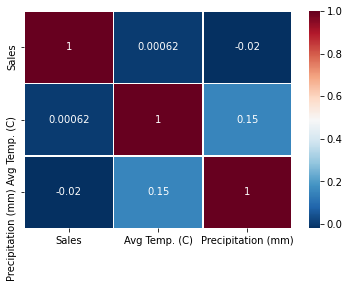

In [61]:
import seaborn as sb
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## Feature Engineering

In [64]:
merged_df = time_features(merged_df)
merged_df

,ts_id,Date,Sales,Avg Temp. (C),Precipitation (mm),Year_Nominal,Year_Num,Quarter_Num,Quarter_Sin,Quarter_Cos,Month_Num,Month_Sin,Month_Cos
0,BB - BALANCE BAR,2018-01-01,14002.408422,1.244987,232722.7,2018,1,1,0.0,1.0,1,0.0,1.0
1,BF - BODY FORTRESS,2018-01-01,27542.668265,1.244987,232722.7,2018,1,1,0.0,1.0,1,0.0,1.0
2,Brand_Not_Given,2018-01-01,2461.440000,1.244987,232722.7,2018,1,1,0.0,1.0,1,0.0,1.0
3,DO - DOCTOR ORGANICS,2018-01-01,1595.039725,1.244987,232722.7,2018,1,1,0.0,1.0,1,0.0,1.0
4,DS - DISNEY BRAND,2018-01-01,7385.050834,1.244987,232722.7,2018,1,1,0.0,1.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,SK - SUNDOWN KIDS,2021-01-01,2380.889043,1.910199,95204.8,2021,4,1,0.0,1.0,1,0.0,1.0
823,SN - SUNDOWN NONEQUITY KIDS,2021-01-01,728.277551,1.910199,95204.8,2021,4,1,0.0,1.0,1,0.0,1.0
824,SO - SUNDOWN ORGANICS,2021-01-01,940.563584,1.910199,95204.8,2021,4,1,0.0,1.0,1,0.0,1.0
825,SU - SOLGAR USNUTRITION,2021-01-01,0.000000,1.910199,95204.8,2021,4,1,0.0,1.0,1,0.0,1.0


In [95]:
pearson = merged_df.corr(method='pearson')

<AxesSubplot:>

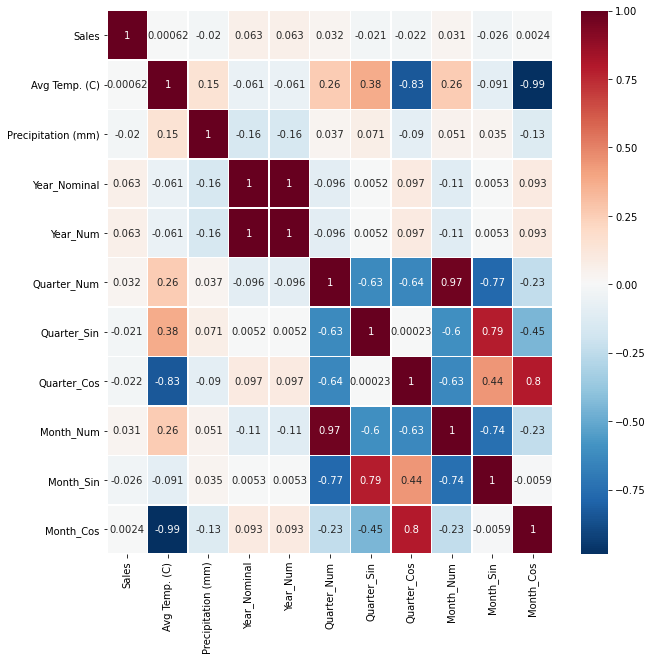

In [100]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

## Data Split into Train and test

In [84]:
# Date to cut the data into train and test sets
cut_off_date='2020-04-01'

data_df = merged_df

data_max_date='2021-01-01'
print("data_df",data_df.shape)
data_df1=data_df[data_df.Date<=data_max_date]
print("data_df1",data_df1.shape)

# train and test split
train = data_df1[data_df1.Date<=cut_off_date]
test = data_df1[data_df1.Date>cut_off_date]
print("train",train.shape)
print("test",test.shape)

data_df (827, 13)
data_df1 (827, 13)
train (611, 13)
test (216, 13)


Index(['ts_id', 'Date', 'Sales', 'Avg Temp. (C)', 'Precipitation (mm)',
       'Year_Nominal', 'Year_Num', 'Quarter_Num', 'Quarter_Sin', 'Quarter_Cos',
       'Month_Num', 'Month_Sin', 'Month_Cos'],
      dtype='object')

In [86]:
time_col = 'Date'
y_col = 'Sales'
train.columns
train = train.set_index(['ts_id','Date'])
test = test.set_index(['ts_id','Date'])

X_train = train.drop(["Sales"],axis=1)
y_train = train['Sales']

X_test = test.drop(["Sales"],axis=1)
y_test = test['Sales']

cat_cols = X_train.select_dtypes('O').columns.tolist()
print(cat_cols)

[]


In [87]:
#catboost enccoding

encoder = ce.CatBoostEncoder(cols = cat_cols, drop_invariant=True, random_state=42)
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

test_for_write = test.copy()

C:\Users\kadambini.indurkar\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## XgBoost

In [104]:
regressor = XGBRegressor(n_estimators = 100, n_jobs = 10,random_state = 123)
regressor.fit(X_train, y_train)
prediction_Xgboost = regressor.predict(X_test)
print(1-(np.sum(np.abs(prediction_Xgboost-y_test.values.ravel()))/np.sum(y_test)))
test_for_write['prediction_Xgboost'] = prediction_Xgboost



-0.29573344942471014


array([60570.363, 60570.363, 60570.363, 60570.363, 60570.363, 60570.363,
       60570.363, 60570.363, 60570.363, 60570.363, 60570.363, 60570.363,
       60570.363, 60570.363, 60570.363, 60570.363, 60570.363, 60570.363,
       60570.363, 60570.363, 60570.363, 60570.363, 60570.363, 60570.363,
       60605.34 , 60605.34 , 60605.34 , 60605.34 , 60605.34 , 60605.34 ,
       60605.34 , 60605.34 , 60605.34 , 60605.34 , 60605.34 , 60605.34 ,
       60605.34 , 60605.34 , 60605.34 , 60605.34 , 60605.34 , 60605.34 ,
       60605.34 , 60605.34 , 60605.34 , 60605.34 , 60605.34 , 60605.34 ,
       63944.39 , 63944.39 , 63944.39 , 63944.39 , 63944.39 , 63944.39 ,
       63944.39 , 63944.39 , 63944.39 , 63944.39 , 63944.39 , 63944.39 ,
       63944.39 , 63944.39 , 63944.39 , 63944.39 , 63944.39 , 63944.39 ,
       63944.39 , 63944.39 , 63944.39 , 63944.39 , 63944.39 , 63944.39 ,
       74650.71 , 74650.71 , 74650.71 , 74650.71 , 74650.71 , 74650.71 ,
       74650.71 , 74650.71 , 74650.71 , 74650.71 , 

(216,)
ts_id                        Date      
BB - BALANCE BAR             2020-05-01    32127.708481
BE - BEST BAR EVER           2020-05-01        0.000000
BF - BODY FORTRESS           2020-05-01    44673.862437
Brand_Not_Given              2020-05-01     2292.832072
DO - DOCTOR ORGANICS         2020-05-01      404.064268
                                               ...     
SK - SUNDOWN KIDS            2021-01-01     2380.889043
SN - SUNDOWN NONEQUITY KIDS  2021-01-01      728.277551
SO - SUNDOWN ORGANICS        2021-01-01      940.563584
SU - SOLGAR USNUTRITION      2021-01-01        0.000000
SW - STAR WARS LUCASFILM     2021-01-01      563.686531
Name: Sales, Length: 216, dtype: float64


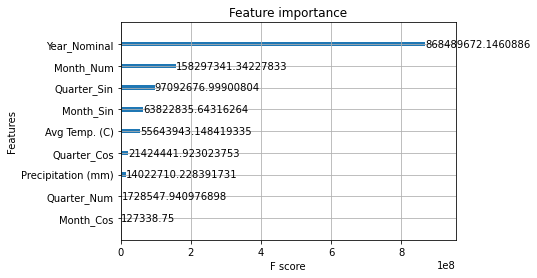

In [101]:
from xgboost import plot_importance
plot_importance(regressor,importance_type='gain')
print(prediction_Xgboost.shape)
print(y_test)

## Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, n_jobs = 10,random_state = 123)
rf.fit(X_train, y_train)
prediction_RandomForest = rf.predict(X_test)
print(1-(np.sum(np.abs(prediction_RandomForest-y_test.values.ravel()))/np.sum(y_test)))
test_for_write['Prediction_RandomForest'] = prediction_RandomForest
test_for_write.head(2)

-0.33573040054596226


,,Sales,Avg Temp. (C),Precipitation (mm),Year_Nominal,Year_Num,Quarter_Num,Quarter_Sin,Quarter_Cos,Month_Num,Month_Sin,Month_Cos,prediction_Xgboost,Prediction_RandomForest
ts_id,Date,,,,,,,,,,,,,
BB - BALANCE BAR,2020-05-01,32127.708481,13.773316,370101.1,2020,3,2,1.0,6.123234e-17,5,0.866025,-0.5,60570.363281,65805.914203
BE - BEST BAR EVER,2020-05-01,0.000000,13.773316,370101.1,2020,3,2,1.0,6.123234e-17,5,0.866025,-0.5,60570.363281,65805.914203
